## Diferencias Finitas

**Recordemos que:** dada una función $f: R \to R$ diremos que $f$ es diferenciable en $x = x_0$ si el siguiente límite existe:

$$
\lim_{dx \to 0} \frac{f(x+dx) - f(x)}{dx}
$$
tanto para $dx$ positivo como negativo.

El proceso de límite es fundamental en la definición y es lo que introduce lo nuevo en el concepto.

Hay una suposición subyasente en muchas áreas de la física y es que: **los modelos y las leyes que nos permiten explicar el comportamiento de la materia se basan en la hipótesis del contínuo y en la existencia de leyes diferenciales**. Es decir, modelamos aspectos de la realidad que observamos usando funciones que toman valores en contínuos y las ecuaciones que describen el funcionamiento son relaciones entre derivadas. 

Por ejemplo, las ecuaciones de Newton nos dicen,

$$
m \frac{d^2x}{dt^2} = F(t,x).
$$

Es decir una relación entre las derivadas segundas de un observable, la posición, es proporcional a las fuerzas aplicadas.

Sin embargo, en muchas circunstancias es preciso calcular aproximaciones a las derivadas de funciones cuando solo conocemos sus valores en un conjunto finito de puntos y por lo tanto no existe la posibilidad tomar límites.

Esta situación sucede habitualmente en dos circunstancias: 

1. Cuando tenemos datos experimentales y por lo tanto tenemos un número finito de datos con que trabajar, en general pares $\{(x_i,y_i)\}, \;\; i = 1 \dots n$ donde los $\{x_i\}$ son parámetros que podemos variar (con cierta libertad) en nuestra configuración experimental y los $\{y_i\}$ son los resultados experimentales. Por ejemplo si queremos medir la presión de un gas $\{p_i\}$, cuando vamos cambiando su volúmen $\{V_i\}$ mientras mantenemos la temperatura constante. Los errores inherentes en las mediciones hacen que estas sean en efecto discretas.

2. Cuando queremos realizar cálculos numéricos concretos sobre funciones y solo las podemos representar como conjuntos de valores en ciertos puntos. Por ejemplo, en el caso de las ecuaciones de Newton, describiremos a la función $x(t)$ como un conjunto de puntos $x_i$ definidos a los tiempos $t_i$. Otro ejemplo usual es cuando queremos calcular cómo se mueve una onda en un canal la representaremos como un conjunto de alturas a distintas posiciones (usualmente equiespaciadas), $\{A_i\}$ $\{x_i\}$. 



### Aproximación a la derivada primera de primer orden

Como explicado anteriormente, supondremos que los valores que tenemos en los conjuntos $\{(x_i,y_i)\}$ provienen de evaluaciones de funciones $f(x)$ que son suaves. Con esta suposición queremos aproximar la primer derivada de $f$ en uno de los puntos $x_i$. 

Utilizando dos puntos, $x_1$ y $x_2$ podemos aproximar la derivada por el cociente de las diferencias, lo que llamamos una *diferencia finita*, ya que no estamos pensando en tomar el límite $x_2 \to x_1$, pero si tomar intervalos pequeños pero finitos,

$$
D_1 f := \frac{f(x_2) - f(x_1)}{x_2 - x_1} \;\;\;\; \text{Diferencia finita por la derecha}
$$

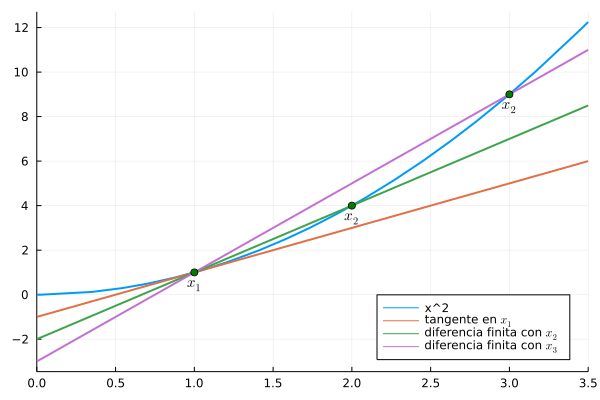

In [1]:
using Plots
using LaTeXStrings
f(x) = x^2
x1=1
x2=2
x3=3
a2 = (f(x2) - f(x1))/(x2-x1)
b2 = f(x1) - a2*x1
a3 = (f(x3) - f(x1))/(x3-x1)
b3 = f(x1) - a3*x1
plot(f, xlim=(0,3.5), lw = 2, label="x^2", legend=:bottomright)
#plot!([1], [f(1)], label="x_1", lw=3)

plot!(x-> 2*x1*x - x1^2 , lw = 2, label="tangente en \$x_1\$")
plot!(x-> a2*x + b2, lw = 2, label="diferencia finita con \$x_2\$")
plot!(x-> a3*x + b3, lw = 2, label="diferencia finita con \$x_3\$")
scatter!([x1], [f(x1)], c="green", ann=(x1, f(x1) - 0.5, L"x_1", 10), label="")
scatter!([x2], [f(x2)], c="green", ann=(x2, f(x2) - 0.5, L"x_2", 10), label="")
scatter!([x3], [f(x3)], c="green", ann=(x3, f(x3) - 0.5, L"x_2", 10), label="")

Cuál es el error en que incurrimos cuando hacemos esto? Naturalmente puede ser muy grande, pero el teorema de Taylor nos ayuda a cuantificarlo, y sobre todo ver que decrece cuando tomamos intervalos más y más pequeños.

Recordemos el teorema Taylor:

*Sea $f \in C^2[a,b]$, luego existe $\zeta \in [a,b]$ tal que*

$$
f(x_2) = f(x_1) + f^{'}(x_1)(x_2 - x_1) + \frac{1}{2} f^{''}(\zeta)\;(x_2 - x_1)^2
$$

Vemos entonces que:

$$
D_1 f - f^{'}(x_1):= \frac{f(x_2) - f(x_1)}{x_2 - x_1} - f^{'}(x_1) = \frac{1}{2}f^{''}(\zeta)(x_2 - x_1)
$$

Y por lo tanto,

$$
Error := |D_1 f - f^{'}(x_1)| \leq |\frac{1}{2}f^{''}(\zeta)|\;|(x_2 - x_1)|
$$

Podemos notar dos aspectos de esta desigualdad:

1. El error depende de la magnitud de la derivada segunda. Si por alguna razón podemos estimar dicha magnitud podremos estimar el error.

2. El error depende linealmente de la diferencia entre los puntos tomados. A menor diferencia menor error. Veremos que podemos encontrar métodos donde el error disminuye apreciablemente.

#### Ejemplo:

Supongamos que tenemos la serie de mediciones $\{(x_i, t_i)\}$ representando la caída vertical de un cuerpo bajo la influencia de la gravedad, y quizá algún efecto de rozamiento.

Si queremos estimar la velocidad, $\frac{dx}{dt}$ usando las diferencias divididas,

$$
\frac{x_{i+1} - x_{i}}{t_{i+1} - t_i},
$$ 

podemos estimar el error ya que la derivada segunda de $x$ con respecto a $t$ es la acelaración y esta estará relacionada con las fuerzas y la masa a través de la ley de Newton:
$$
|\frac{d^2x}{dt^2}| \leq |\frac{F}{m}| \leq \frac{g}{m}
$$

Conociendo este hecho entonces podemos diseñar nuestro aparato de medición de forma que tome intervalos consecutivos de las posiciones y tiempos de forma tal que los intervalos temporales sean tales que nos acoten el error en la velocidad a los niveles deseados. 

### Errores en puntos intermedios

El cálculo anterior nos dió una cota para el error cuando estimamos la derivada por diferencias finitas justo en el punto $x_1$. Cuál es el error en puntos intermedios entre $x_1$ y $x_2$?. Notemos que si aplicamos el teorema del valor medio comenzando con el punto $x_2$ llegaremos exactamente a la misma expresión para el error y su cota, excepto que ahora el término de las derivadas segundas tendrá el signo contrario. El error tiene la misma estimación para este punto! Es de esperar entonces que el error será similar para todos los puntos intermedios.

Para ver esto ahora usamos el teorema de Taylor para un punto arbitrario en el intervalo $x \in [x_1,x_2]$


$$
f(x_1) - f(x) = f^{'}(x)(x_1 - x) + \frac{1}{2} f^{''}(\zeta_1)(x_1 - x)^2 
$$

Usando ahora $x_2$,

$$
f(x_2) - f(x) = f^{'}(x)(x_2 - x) + \frac{1}{2} f^{''}(\zeta_2)(x_2 - x)^2 
$$

Y restando la primera de la segunda obtenemos, 

$$
f(x_2) - f(x_1) = -f^{'}(x)(x_1 - x) + f^{'}(x)(x_2 - x) - \frac{1}{2} f^{''}(\zeta_1)(x_1 - x)^2 + \frac{1}{2} f^{''}(\zeta_2)(x_2 - x)^2 
$$

Por lo tanto,

$$
\frac{f(x_2) - f(x_1)}{x_2 - x_1} = f^{'}(x) - \frac{1}{2} [f^{''}(\zeta_1)\frac{(x_1 - x)^2}{x_2 - x_1} - f^{''}(\zeta_2)\frac{(x_2 - x)^2}{x_2 - x_1}].
$$

Finalmente obtenemos:

$$
Error = |\frac{f(x_2) - f(x_1)}{x_2 - x_1} - f^{'}(x)| \leq  \max_{\zeta \in [x_1,x_2]}|f^{''}(\zeta)|\; |x_2 - x_1|.
$$

Y constatamos que el error tiene una cota similar para los puntos intermedios.

#### Ejemplo:

Sea $f(x) = x^2$ luego las diferencias finitas nos dan, 

$$
D_1 f(x) = \frac{(x + \Delta x)^2 - x^2}{\Delta x} = 2x + \Delta x,
$$

y por lo tanto,

$$
D_1 f(x) - f^{'}(x) = \Delta x
$$

Recordando que $f^{''}(x) = 2$ vemos que el error es justamente el de la cota anterior.

### Diferencias finitas de mayor orden.

Si tenemos más de dos puntos podemos lograr mejores aproximaciones a las derivadas. Por ejemplo con tres puntos equiespaciados, $(x_1, x_2= x_1+\Delta x, x_3 = x_1 + 2\Delta x)$, podemos lograr una aproximación mucho mejor para algunos puntos en particular:

**Afirmación:**

$$
D_2 f := \frac{f(x_3) - f(x_1)}{x_3 - x_1}
$$

Es una aproximación a la derivada en el punto $x_2$ que es precisa orden $\Delta x^2$. *Se la denomina diferencia finita centrada*

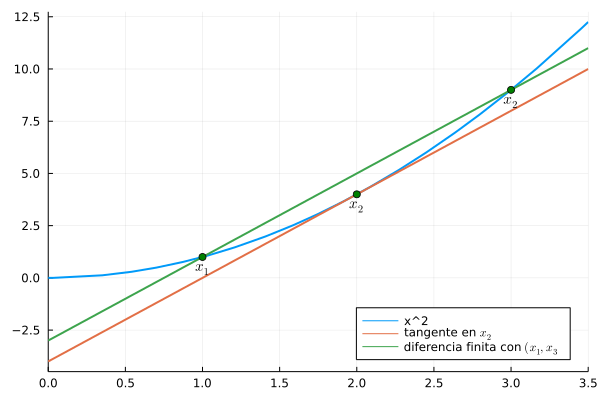

In [2]:
x1=1
x2=2
x3=3
a3 = (f(x3) - f(x1))/(x3-x1)
b3 = f(x1) - a3*x1
plot(f, xlim=(0,3.5), label="x^2", lw = 2, legend=:bottomright)
#plot!([1], [f(1)], label="x_1", lw=3)

plot!(x-> 2*x2*x - x2^2, lw = 2, label="tangente en \$x_2\$")
plot!(x-> a3*x + b3, lw = 2, label="diferencia finita con \$(x_1,x_3\$")
scatter!([x1], [f(x1)], c="green", ann=(x1, f(x1) - 0.5, L"x_1", 10), label="")
scatter!([x2], [f(x2)], c="green", ann=(x2, f(x2) - 0.5, L"x_2", 10), label="")
scatter!([x3], [f(x3)], c="green", ann=(x3, f(x3) - 0.5, L"x_2", 10), label="")

Para ver esto ahora usamos el teorema de Taylor (pero para un orden de derivada más) para el punto $x_2$,


$$
f(x_1) - f(x_2) = f^{'}(x_2)(x_1 - x_2) + \frac{1}{2} f^{''}(x_2)(x_1 - x_2)^2 + \frac{1}{6} f^{'''}(\zeta_1)(x_1 - x_2)^3
$$

Similarmente intercambiando $x_1$ por $x_3$,

$$
f(x_3) - f(x_2) = f^{'}(x_2)(x_3 - x_2) + \frac{1}{2} f^{''}(x_2)(x_3 - x_2)^2 + \frac{1}{6} f^{'''}(\zeta_3)(x_3 - x_2)^3
$$

Y restando la primera de la segunda obtenemos, 

$$
f(x_3) - f(x_1) = f^{'}(x_2)(x_3 - x_1) + \frac{1}{2} f^{''}(x_2)(x_3 - x_2)^2 - \frac{1}{2} f^{''}(x_2)(x_1 - x_2)^2 + \frac{1}{6} f^{'''}(\zeta_3)(x_3 - x_2)^3 - \frac{1}{6} f^{'''}(\zeta_1)(x_1 - x_2)^3
$$

Por lo tanto,

$$
\frac{f(x_3) - f(x_1)}{x_3 - x_1} = f^{'}(x_2) + \frac{1}{2} f^{''}(x_2)[\frac{(x_3 - x_2)^2}{x_3 - x_1} - \frac{(x_1 - x_2)^2}{x_3 - x_1}] + \frac{1}{6} [f^{'''}(\zeta_1)\frac{(x_1 - x_2)^3}{x_3 - x_1} - f^{'''}(\zeta_2)\frac{(x_3 - x_2)^3}{x_3 - x_1}].
$$

Imponiendo ahora la condición de que los intervalos son iguales ($x_3 - x_2 = x_2 - x_1 = \Delta x$) los términos en derivadas primeras se cancelan y obtenemos:

$$
Error = |\frac{f(x_2) - f(x_1)}{x_2 - x_1} - f^{'}(x_2)| \leq  \frac{1}{6}\max_{\zeta \in [x_1,x_2]}|f^{'''}(\zeta)|\; \Delta x^2.
$$

Notemos que:

1. El error va a cero como $\Delta x^2$, por lo tanto, para un mismo $\Delta x$ el error de la diferencia centrada es mucho menor.
2. Notemos que usamos solo dos puntos, o sea el *costo* en la evaluación de $f$ (de ser necesaria) es el mismo que para la diferencia finita inicial que vimos.
3. Si las distancias entre los puntos no son iguales los términos no se cancelan y debemos usar los 3 puntos para construir una diferencia finita que aproxime a ese orden. 

#### Ejercicio 1:

Vea que para el caso donde los intervalos entre las $x_i$ no son iguales de todos modos hay una diferencia finita, usando los 3 puntos, que también es de orden cuadrático. Ayuda, multiplique cada término arriba por un factor tal que los términos en derivadas segundas se cancelan en la resta.

#### Ejercicio 2: 

De la misma manera, pero usando más puntos cercanos, podemos obtener diferencias finitas de mayor orden. Constate que si tomamos una función lineal, luego la diferencia finita $D_x$ es exactamente igual a la derivada de la misma y del mismo modo la diferencia finita centrada de un polinomio de segundo grado coincide con la derivada del mismo.
Que se podrá afirmar en general? 

#### Ejercicio 3: 

Podemos usar el hecho que una diferencia finita de orden $n$ de un polinomio de orden hasta el grado $n$ coincide con la derivada de los mismos ($D_n P^m(x) = \frac{dP^m}{dx}(x)$ si $m \leq n$) para encontrar los coeficientes de estas diferencias finitas?

#### Ejemplo: 

Calcularemos ambas diferencias finitas de la función `sin(x)` entre $0$ y $2\pi$ y compararemos con la derivada exacta `cos(x)`.

In [3]:
dx = 0.3
x = 0:dx:2π
v = sin.(x)
dv(dx) = (sin.(x.+dx) - sin.(x))/dx;
dv0(dx) = (sin.(x.+dx) - sin.(x.-dx))/2/dx;

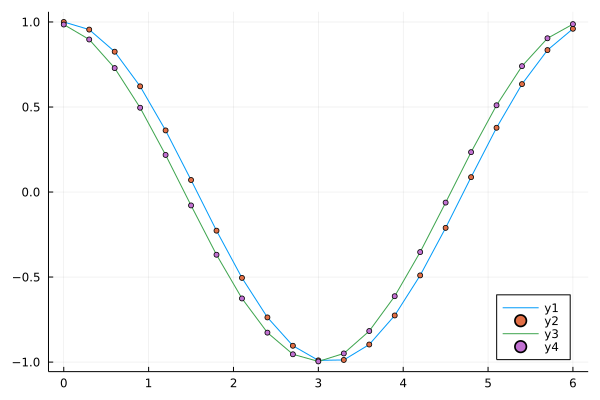

In [4]:
plot(x, cos.(x), legend=:bottomright)
scatter!(x,cos.(x),ms=3)
plot!(x,dv(dx))
scatter!(x,dv(dx),ms=3)

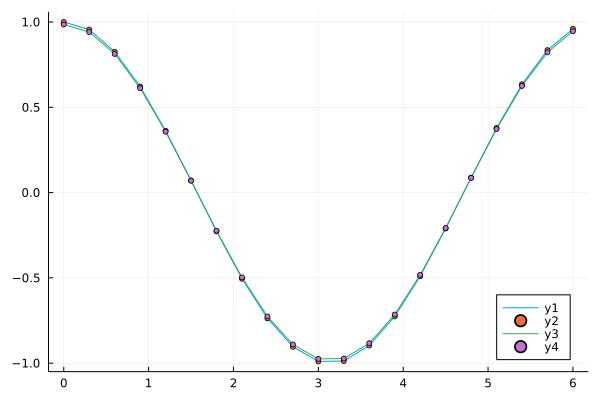

In [5]:
plot(x, cos.(x), legend=:bottomright)
scatter!(x,cos.(x),ms=3)
plot!(x,dv0(dx))
scatter!(x,dv0(dx),ms=3)

Ahora calcularemos el error total como función de dx

In [15]:
Error_1(dx) = sqrt(sum(dv(dx) - cos.(x)).^2)*dx
Error_2(dx) = sqrt(sum(dv0(dx) - cos.(x)).^2)*dx

Error_2 (generic function with 1 method)

In [20]:
rdx = [2.0^(-i)*0.5 for i in 1:12]

12-element Vector{Float64}:
 0.25
 0.125
 0.0625
 0.03125
 0.015625
 0.0078125
 0.00390625
 0.001953125
 0.0009765625
 0.00048828125
 0.000244140625
 0.0001220703125

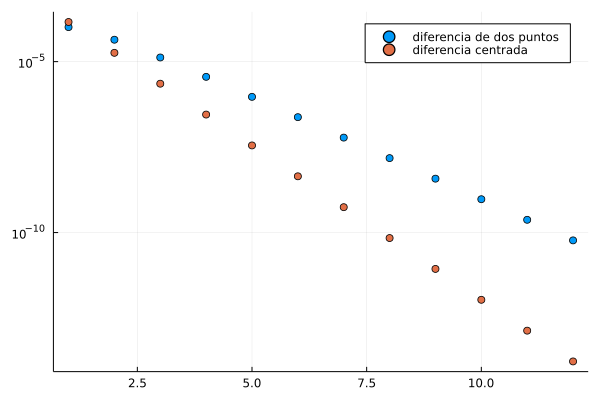

In [21]:
scatter(Error_1.(rdx), yscale=:log10, label="diferencia de dos puntos")
scatter!(Error_2.(rdx), label="diferencia centrada")